In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [85]:
# loading the csv data to a Pandas DataFrame with the path
gold_data = pd.read_csv(r"C:\Users\samee\Downloads\gld_price_data.csv")

In [86]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [87]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [88]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [89]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [90]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [91]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

Positive Correlation
Negative Correlation

In [92]:
correlation = gold_data.drop('Date', axis=1).corr()

Exclude non-numeric columns (like dates) before calling .corr()

<Axes: >

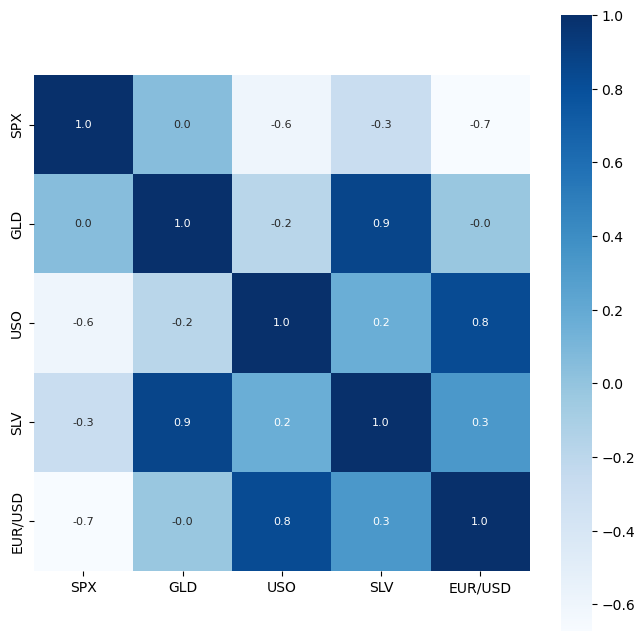

In [93]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [94]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\samee\AppData\Local\Temp\ipykernel_21760\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

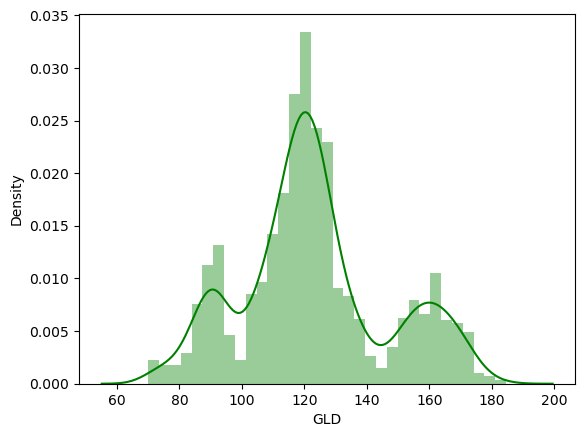

In [105]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [106]:
#Splitting the Features and Target
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']



In [107]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [108]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [109]:
#Splitting into Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [110]:
regressor = RandomForestRegressor(n_estimators=100)

In [111]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [112]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.93989989  81.98389972 115.82470049 127.53610093 120.61090174
 154.75919751 150.20329894 126.16100087 117.46229878 125.98070085
 116.84470119 170.99820097 141.0060981  167.87419859 115.0437
 117.61690033 137.91370347 170.25410117 159.55980281 159.66319968
 155.14530056 125.05210014 175.93529981 157.33630282 125.22950022
  93.74119963  77.24350022 120.72540019 119.08119941 167.47749938
  88.1853006  125.25950026  91.19920102 117.67700012 121.11239858
 137.55890101 115.19950128 115.41370057 147.97190034 107.08720093
 103.88230219  87.34509804 126.38560102 118.06940011 151.92269854
 119.60020032 108.32000011 107.91349829  93.2914004  127.06749815
  74.91030025 113.73329958 121.38250028 111.25999892 118.90349875
 120.65819923 159.3955003  166.88040085 146.95749677  85.86239848
  94.33550054  86.89519847  90.6232001  118.94240092 126.44050034
 127.6083     169.64449965 122.23349919 117.47289893  98.46470025
 168.35610097 142.59369805 132.05110196 121.09100209 120.95639926
 119.80020083 

In [114]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.9889745936582924


Comparing the Actual Values and Predicting Values in Plot

In [115]:
Y_test = list(Y_test)

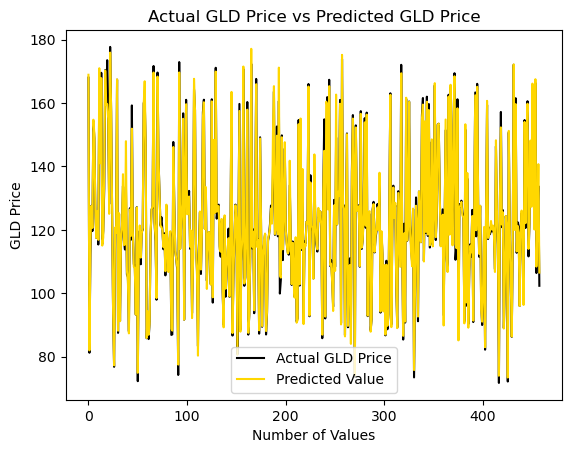

In [121]:
plt.plot(Y_test, color='black', label='Actual GLD Price')
plt.plot(test_data_prediction, color='gold', label='Predicted Value')
plt.title('Actual GLD Price vs Predicted GLD Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()